In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

## 1. Carga y visualización
  * Descarga una imagen de Internet y cárgala utilizando scikit-image.
  * Visualiza la imagen utilizando la función imshow de scikit-image.
  * Muestra la imagen en escala de grises y en color.

<class 'numpy.ndarray'>
(610, 503, 3)


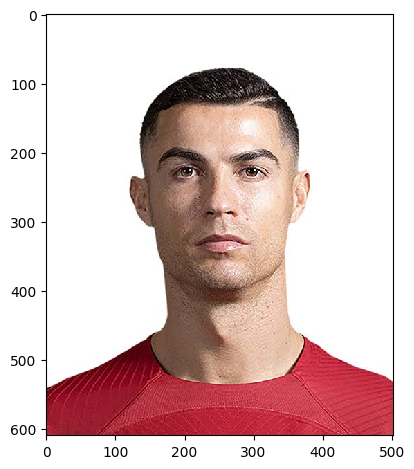

In [2]:
# Cargando la imagen
image = skimage.io.imread('/content/images.jpg')
print(type(image))
print(image.shape)

# Visualización
skimage.io.imshow(image)
skimage.io.show()

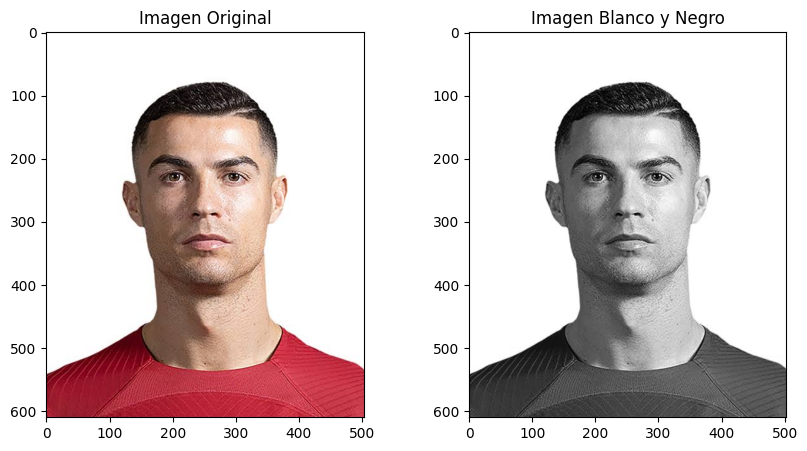

In [3]:
# Imagen en escala de grises
image_gray = skimage.color.rgb2gray(image)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Imagen Original")

ax[1].imshow(image_gray, cmap=plt.cm.gray)
ax[1].set_title("Imagen Blanco y Negro")

plt.show()

## 2. Transformaciones geométricas
  * Aplica rotación de 90 grados a la imagen cargada.
  * Escala la imagen al 50% de su tamaño.
  * Realiza reflexión horizontal de la imagen

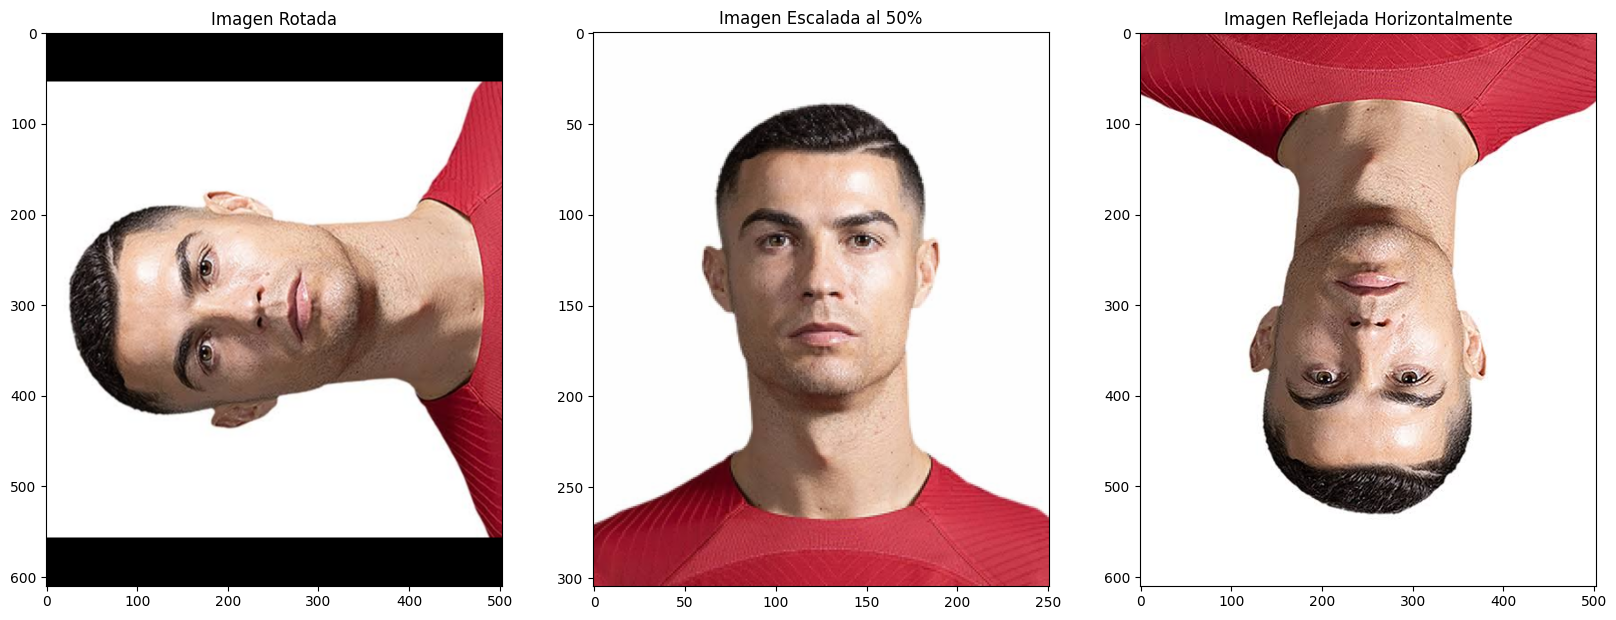

In [4]:
# Rotación de la imagen
rotated_image = skimage.transform.rotate(image, angle=90)

# Escalamiento de la imagen al 50% de su tamaño
scaled_image = skimage.transform.resize(image, (int(image.shape[0]*0.5),int(image.shape[1]*0.5)))

# Reflexión horizontal
reflected_image = np.flipud(image)

# Visualizar las imagenes
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(rotated_image)
ax[0].set_title("Imagen Rotada")

ax[1].imshow(scaled_image)
ax[1].set_title("Imagen Escalada al 50%")

ax[2].imshow(reflected_image)
ax[2].set_title("Imagen Reflejada Horizontalmente")

plt.show()

## 3. Operaciones de filtro

  * Aplica un filtro suavizado (filtro Gaussiano) a la imagen.
  * Utiliza un filtro de borde(por ejemplo, Sobel) para resaltar los bordes en la imagen.
  * Experimenta con diferentes valores de parámetros para cada filtro y observa como afectan la imagen resultante.

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


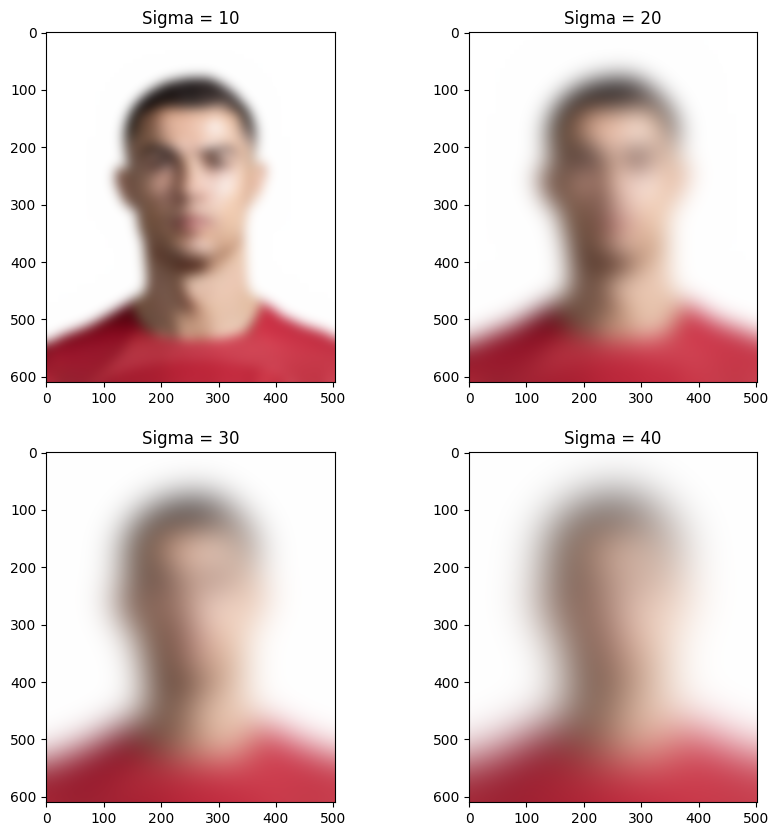

In [5]:
# Filtro Gaussiano
gaussian_1 = skimage.filters.gaussian(image, sigma = 10)
gaussian_2 = skimage.filters.gaussian(image, sigma = 20)
gaussian_3 = skimage.filters.gaussian(image, sigma = 30)
gaussian_4 = skimage.filters.gaussian(image, sigma = 40)

# Visualizar las imagenes
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(gaussian_1)
ax[0].set_title("Sigma = 10")

ax[1].imshow(gaussian_2)
ax[1].set_title("Sigma = 20")

ax[2].imshow(gaussian_3)
ax[2].set_title("Sigma = 30")

ax[3].imshow(gaussian_4)
ax[3].set_title("Sigma = 40")

plt.show()

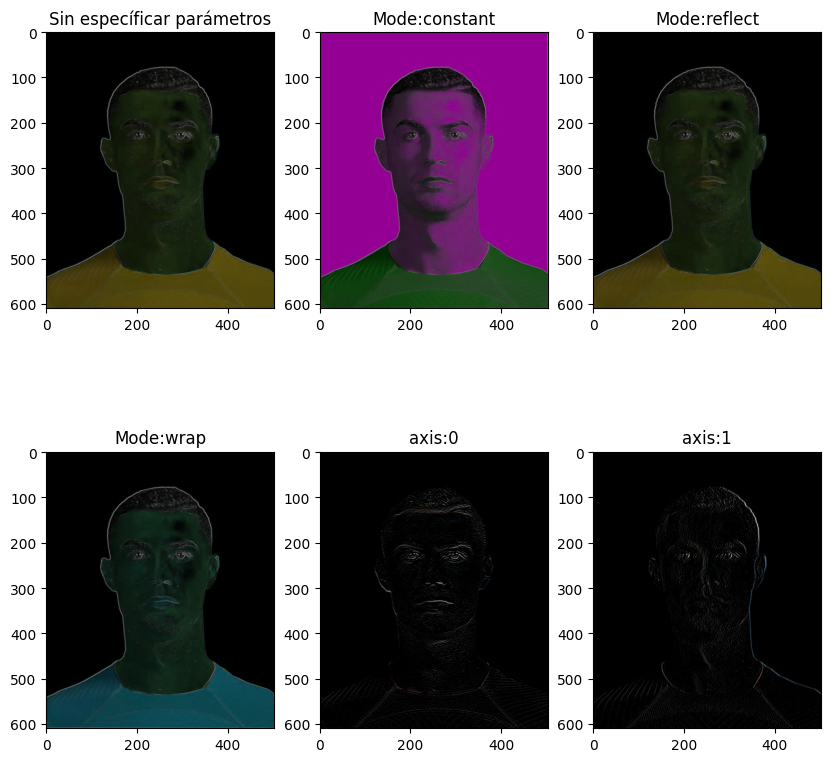

In [6]:
# Filtro Sobel
# Sin parámetros
sobel_1 = skimage.filters.sobel(image)
# mode constant
sobel_2 = skimage.filters.sobel(image,mode='constant')
# mode reflect
sobel_3 = skimage.filters.sobel(image,mode='reflect')
# mode wrap
sobel_4 = skimage.filters.sobel(image,mode='wrap')
# axis 0
sobel_5 = skimage.filters.sobel(image,axis=0)
# axis 1
sobel_6 = skimage.filters.sobel(image, axis=1)


# Visualizar las imagenes
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(sobel_1)
ax[0].set_title("Sin específicar parámetros")

ax[1].imshow(sobel_2)
ax[1].set_title("Mode:constant")

ax[2].imshow(sobel_3)
ax[2].set_title("Mode:reflect")

ax[3].imshow(sobel_4)
ax[3].set_title("Mode:wrap")

ax[4].imshow(sobel_5)
ax[4].set_title("axis:0")

ax[5].imshow(sobel_6)
ax[5].set_title("axis:1")

plt.show()

## 4. Segmentación de imágenes
  * Utiliza algún método de segmentación de umbral para separar objetos de interés del fondo de la imagen.
  * Experimenta con diferentes valores de umbral y métodos de segmentación disponibles en scikit-image.
  * Mide y muestra el tamaño de los objetos segmentados

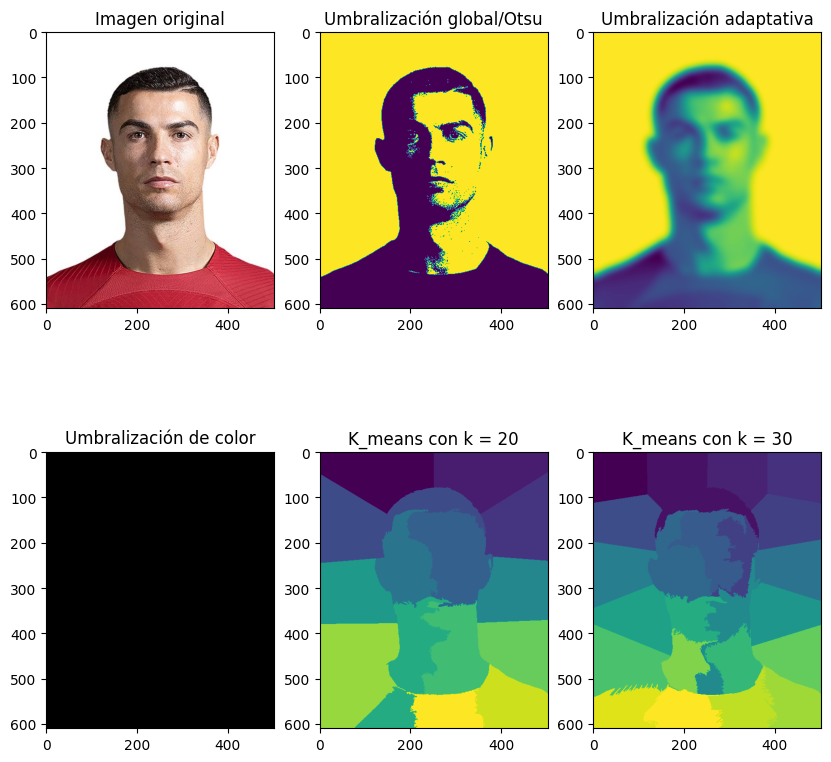

In [9]:
image_gray = skimage.io.imread('/content/images.jpg', as_gray=True)

# Método Umbralización global
## Encontrando un umbral óptimo
threshold_value =skimage.filters.threshold_otsu(image_gray)
## Aplicando el umbral a la imagen
binary_image_otsu = image_gray > threshold_value

# Método Umbralización Adaptativa
binary_image_ua = skimage.filters.threshold_local(image_gray,
                                                  block_size=51,
                                                  method='gaussian',
                                                  offset=10)

# Método Umbralización de color

## Convertir la imagen a espacio de color HSV
hsv_image = skimage.color.rgb2hsv(image)

# Definir el rango de color a detectar (en este ejemplo, verde)
lower_green = (60/360, 0.2, 0.2)
upper_green = (120/360, 1.0, 1.0)

# Aplicar la umbralización de color
mask = (hsv_image[..., 0] >= lower_green[0]) & (hsv_image[..., 0] <= upper_green[0]) & \
       (hsv_image[..., 1] >= lower_green[1]) & (hsv_image[..., 1] <= upper_green[1]) & \
       (hsv_image[..., 2] >= lower_green[2]) & (hsv_image[..., 2] <= upper_green[2])

# Aplicar la máscara a la imagen original
color_thresholded_image = image.copy()
color_thresholded_image[~mask] = 0

# Método K-means
## 5 segmentos
segments_1 = skimage.segmentation.slic(image, n_segments=20)
## 10 segmentos
segments_2 = skimage.segmentation.slic(image, n_segments=30)

# Visualizar las imagenes
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Imagen original")

ax[1].imshow(binary_image_otsu)
ax[1].set_title("Umbralización global/Otsu")

ax[2].imshow(binary_image_ua)
ax[2].set_title("Umbralización adaptativa")

ax[3].imshow(color_thresholded_image)
ax[3].set_title("Umbralización de color")

ax[4].imshow(segments_1)
ax[4].set_title("K_means con k = 20")

ax[5].imshow(segments_2)
ax[5].set_title("K_means con k = 30")

plt.show()

## 5. Operaciones morfológicas

  * Aplica operaciones morfológicas como erosión, dilatación, apertura y cierre a la imagen.
  * Observa como éstas operaciones afectan la forma y estructura de los objetos en la imagen

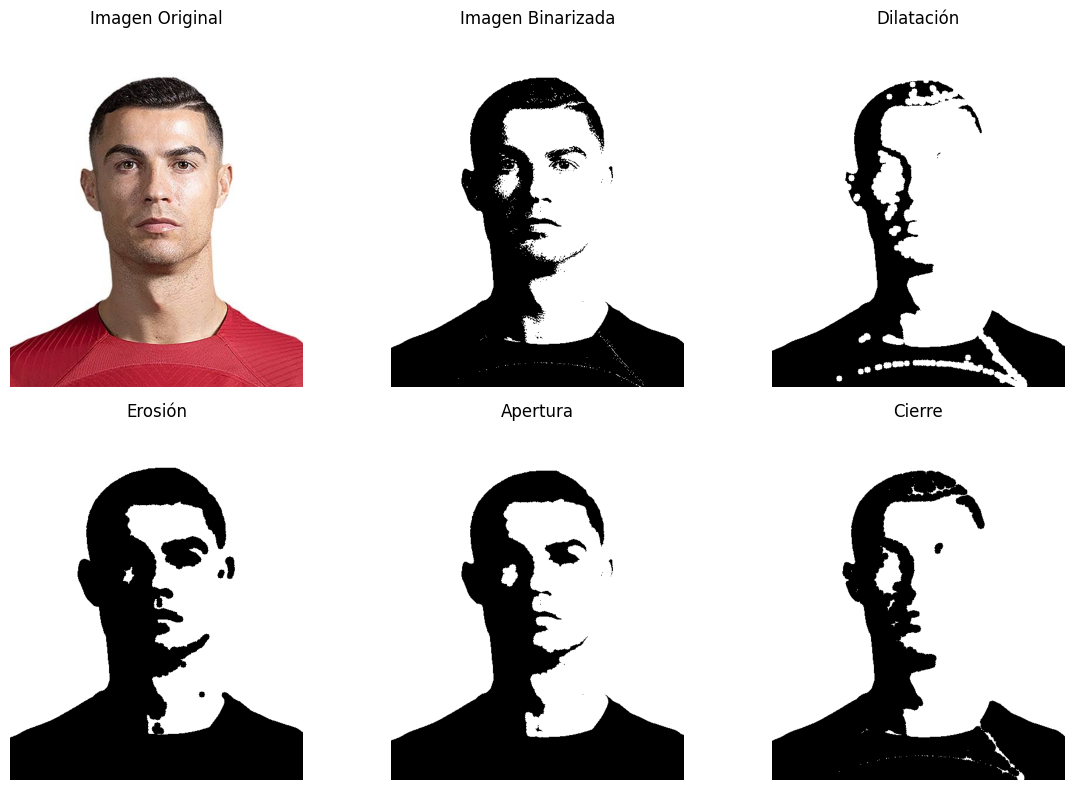

In [10]:
# Binarizar la imagen utilizando un umbral
threshold_value = 0.5
binary_image = image_gray > threshold_value

# Aplicar operaciones morfológicas
# Dilatación
dilated_image = skimage.morphology.binary_dilation(binary_image, skimage.morphology.disk(5))
# Erosión
eroded_image = skimage.morphology.binary_erosion(binary_image, skimage.morphology.disk(5))
# Apertura
opened_image = skimage.morphology.binary_opening(binary_image, skimage.morphology.disk(5))
# Cierre
closed_image = skimage.morphology.binary_closing(binary_image, skimage.morphology.disk(5))

# Mostrar las imágenes resultantes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Imagen Original')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Imagen Binarizada')

ax[2].imshow(dilated_image, cmap='gray')
ax[2].set_title('Dilatación')

ax[3].imshow(eroded_image, cmap='gray')
ax[3].set_title('Erosión')

ax[4].imshow(opened_image, cmap='gray')
ax[4].set_title('Apertura')

ax[5].imshow(closed_image, cmap='gray')
ax[5].set_title('Cierre')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()